# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости экспериментов фиксируется 'зерно случайности'")

Для воспроизводимости экспериментов фиксируется 'зерно случайности'


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.iloc[np.random.choice(len(df_train), 10)]

name  year  selling_price  \
860                            Renault KWID RXT  2016         330000   
5390                     Maruti Ertiga ZDI Plus  2017         825000   
5226                  Hyundai Xcent 1.2 VTVT SX  2020         524000   
5191                    Mahindra XUV500 W10 2WD  2015         850000   
3772             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
3092                 Toyota Innova 2.5 VX 7 STR  2010         515000   
5734    Skoda Rapid 1.6 TDI Ambition Plus Alloy  2012         380000   
6265  Toyota Innova 2.5 Z Diesel 7 Seater BS IV  2014         950000   
466                        Honda City i VTEC VX  2015         900000   
5334                   Maruti Vitara Brezza ZDi  2019         890000   

      km_driven    fuel seller_type transmission        owner     mileage  \
860       20000  Petrol  Individual       Manual  First Owner  25.17 kmpl   
5390      79000  Diesel      Dealer       Manual  First Owner  25.47 kmpl   
5226      32000  Petrol  Individual       Manual  First Owner  20.14 kmpl   
5191     140000  Diesel  Individual       Manual  First Owner   16.0 kmpl   
3772      45000  Diesel      Dealer    Automatic  First Owner  19.33 kmpl   
3092     200000  Diesel  Individual       Manual  First Owner   12.8 kmpl   
5734     145000  Diesel  Individual       Manual  First Owner   20.5 kmpl   
6265      80000  Diesel      Dealer       Manual  First Owner  12.99 kmpl   
466       22000  Petrol  Individual       Manual  First Owner   17.4 kmpl   
5334       9000  Diesel  Individual       Manual  First Owner   24.3 kmpl   

       engine  max_power                     torque  seats  
860    799 CC   53.3 bhp              72Nm@ 4386rpm    5.0  
5390  1248 CC  88.50 bhp             200Nm@ 1750rpm    7.0  
5226  1197 CC  81.86 bhp          113.75nm@ 4000rpm    5.0  
5191  2179 CC    140 bhp        330Nm@ 1600-2800rpm    7.0  
3772  1999 CC    177 bhp        430Nm@ 1750-2500rpm    5.0  
3092  2494 CC    102 bhp  20.4@ 1400-3400(kgm@ rpm)    7.0  
5734  1598 CC  103.5 bhp        250Nm@ 1500-2500rpm    5.0  
6265  2494 CC  100.6 bhp        200Nm@ 1200-3600rpm    7.0  
466   1497 CC  117.3 bhp             145Nm@ 4600rpm    5.0  
5334  1248 CC   88.5 bhp             200Nm@ 1750rpm    5.0

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

Или в отдельности

In [6]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [7]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [10]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [11]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
print("Пропуски в колонках mileage, engine, max_power, torque, seats")

Пропуски в колонках mileage, engine, max_power, torque, seats


In [13]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [14]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [15]:
df_train.duplicated(subset=df_train.drop(columns=['selling_price']).columns.values, keep=False).sum()

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [16]:
df_train[df_train.duplicated(subset=df_train.drop(columns=['selling_price']).columns.values, keep=False)].sort_values(by='name')
# Отсортировано для удобства визуального контроля

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
3291        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
1568        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
361         Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
2652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
3291  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
1568  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
361   Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
2652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
3291     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
1568     190 bhp                400Nm    5.0  
361      190 bhp                400Nm    5.0  
2652     190 bhp                400Nm    5.0  

[1799 rows x 13 columns]

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [17]:
df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns.values, keep='first', inplace=True)

In [18]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [19]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

df_train

In [20]:
import re

In [21]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: re.sub(' bhp', '', x) if type(x) is str else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x) if (type(x) is str and len(x)>0) else np.nan if (type(x) is str and len(x)==0) else x)

df_test

In [22]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: re.sub(' bhp', '', x) if type(x) is str else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x) if (type(x) is str and len(x)>0) else np.nan if (type(x) is str and len(x)==0) else x)

torque

In [23]:
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [24]:
median_df = df_train.median().copy(deep=True)
df_train.fillna(median_df, inplace=True)
df_test.fillna(median_df, inplace=True)

In [25]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [26]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [27]:
print("Предположительно потому что количество мест в авто отражает класс авто, является признаком, по которому все автомобили можно разделить на КАТЕГОРИИ")

Предположительно потому что количество мест в авто отражает класс авто, является признаком, по которому все автомобили можно разделить на КАТЕГОРИИ


In [28]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

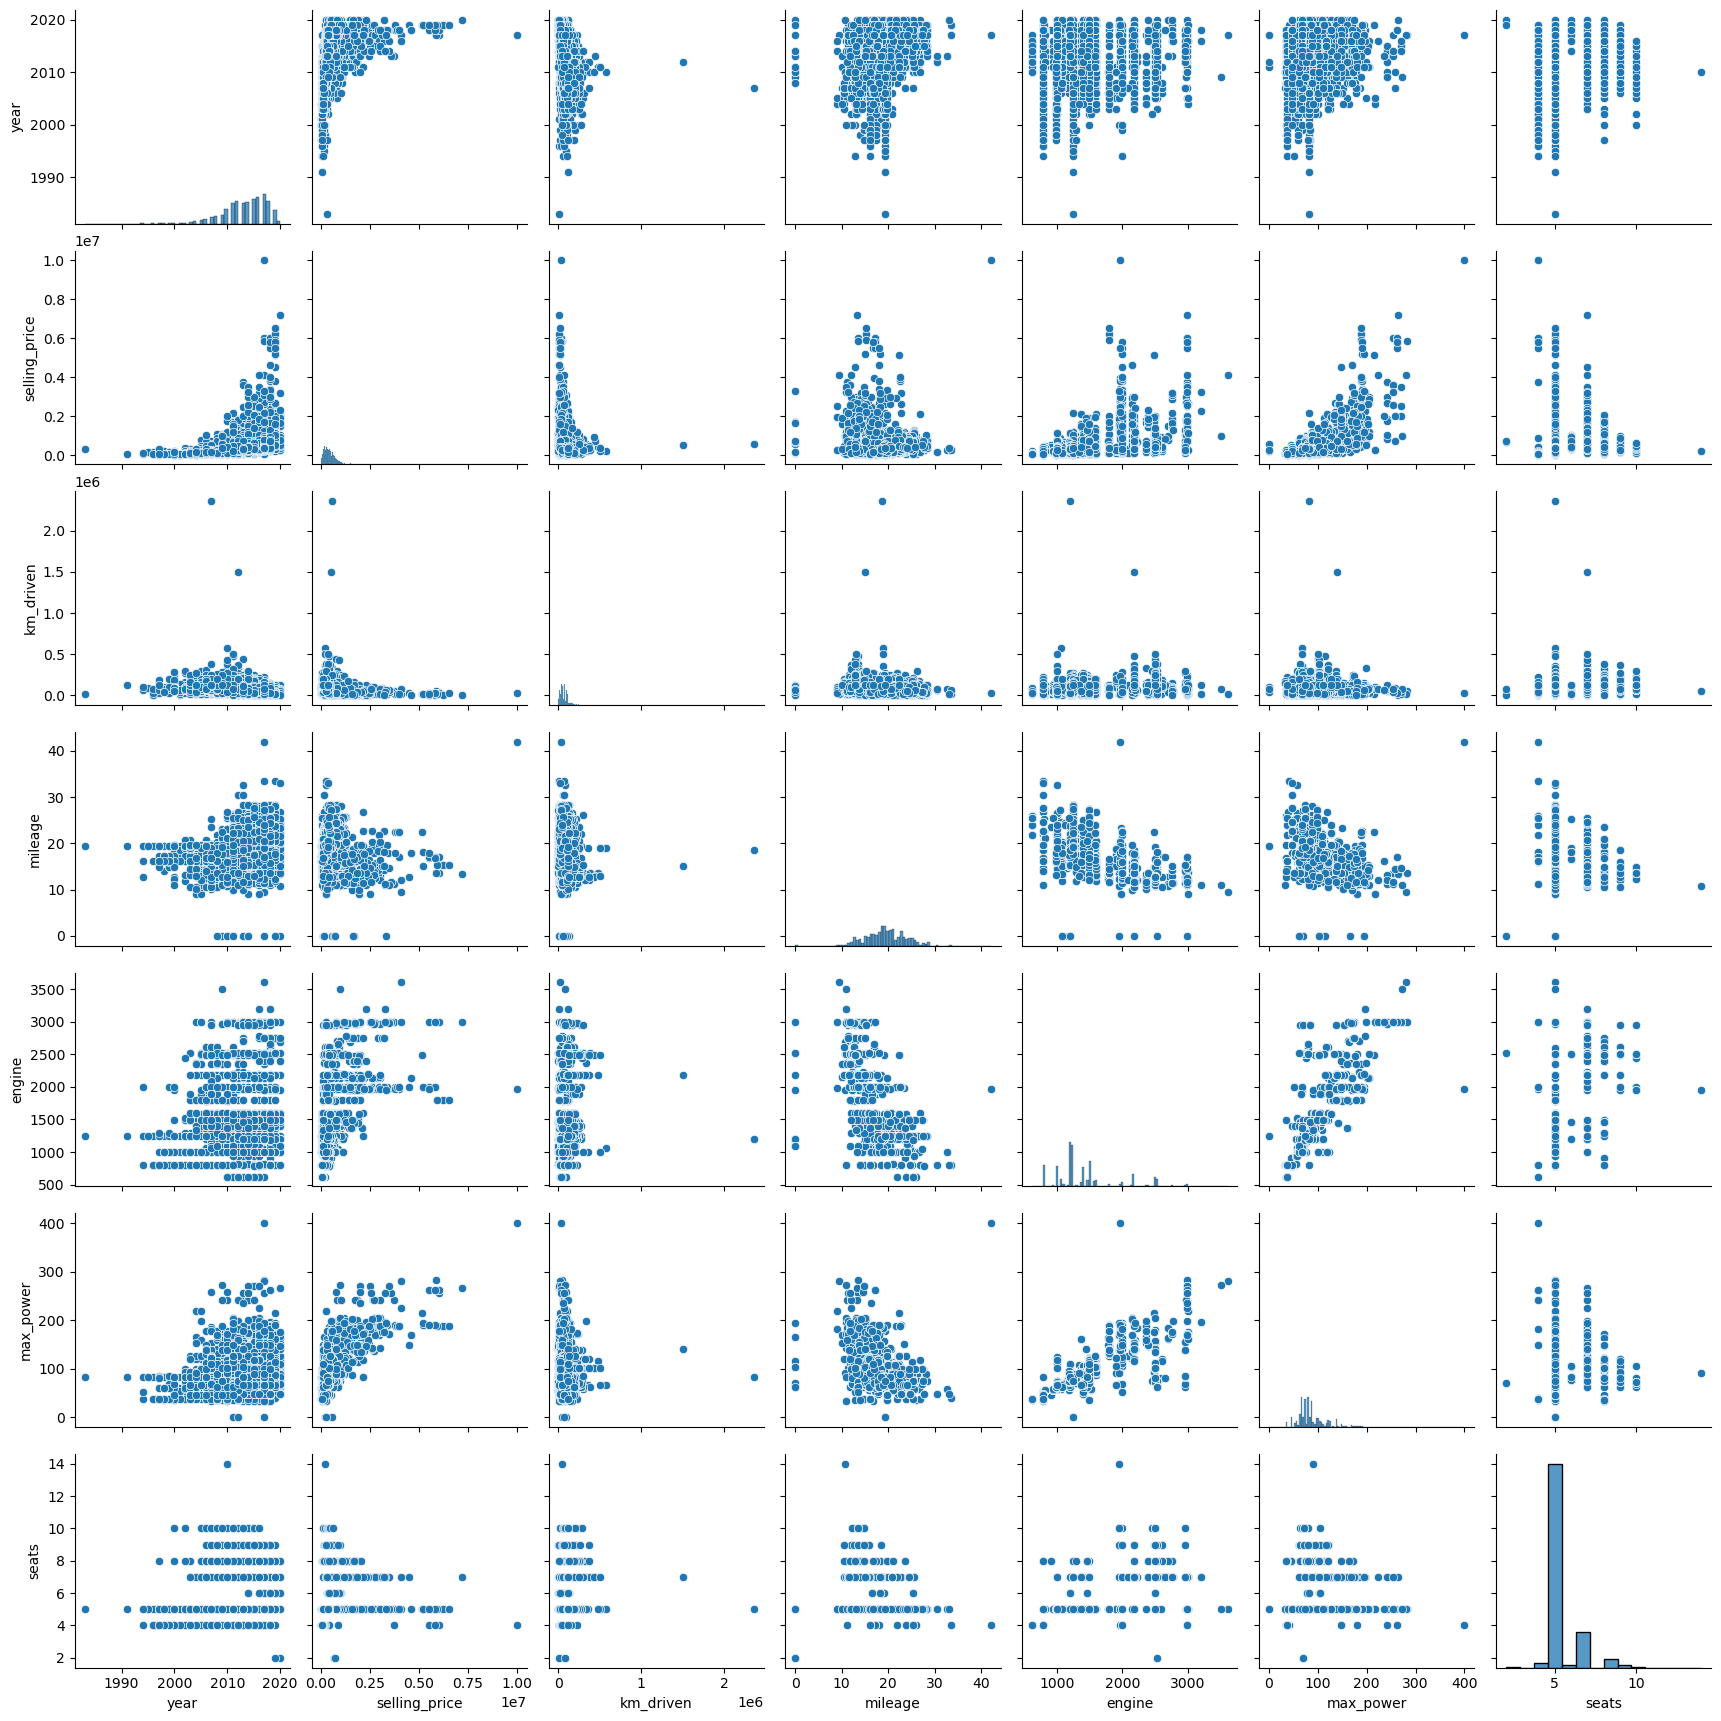

In [29]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [30]:
print("Связь предикторов с целевой переменной слабо выраженная, неоднозначная")
print("Корреляция слабая за исключением быть может связи max_power & engine")

Связь предикторов с целевой переменной слабо выраженная, неоднозначная
Корреляция слабая за исключением быть может связи max_power & engine


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

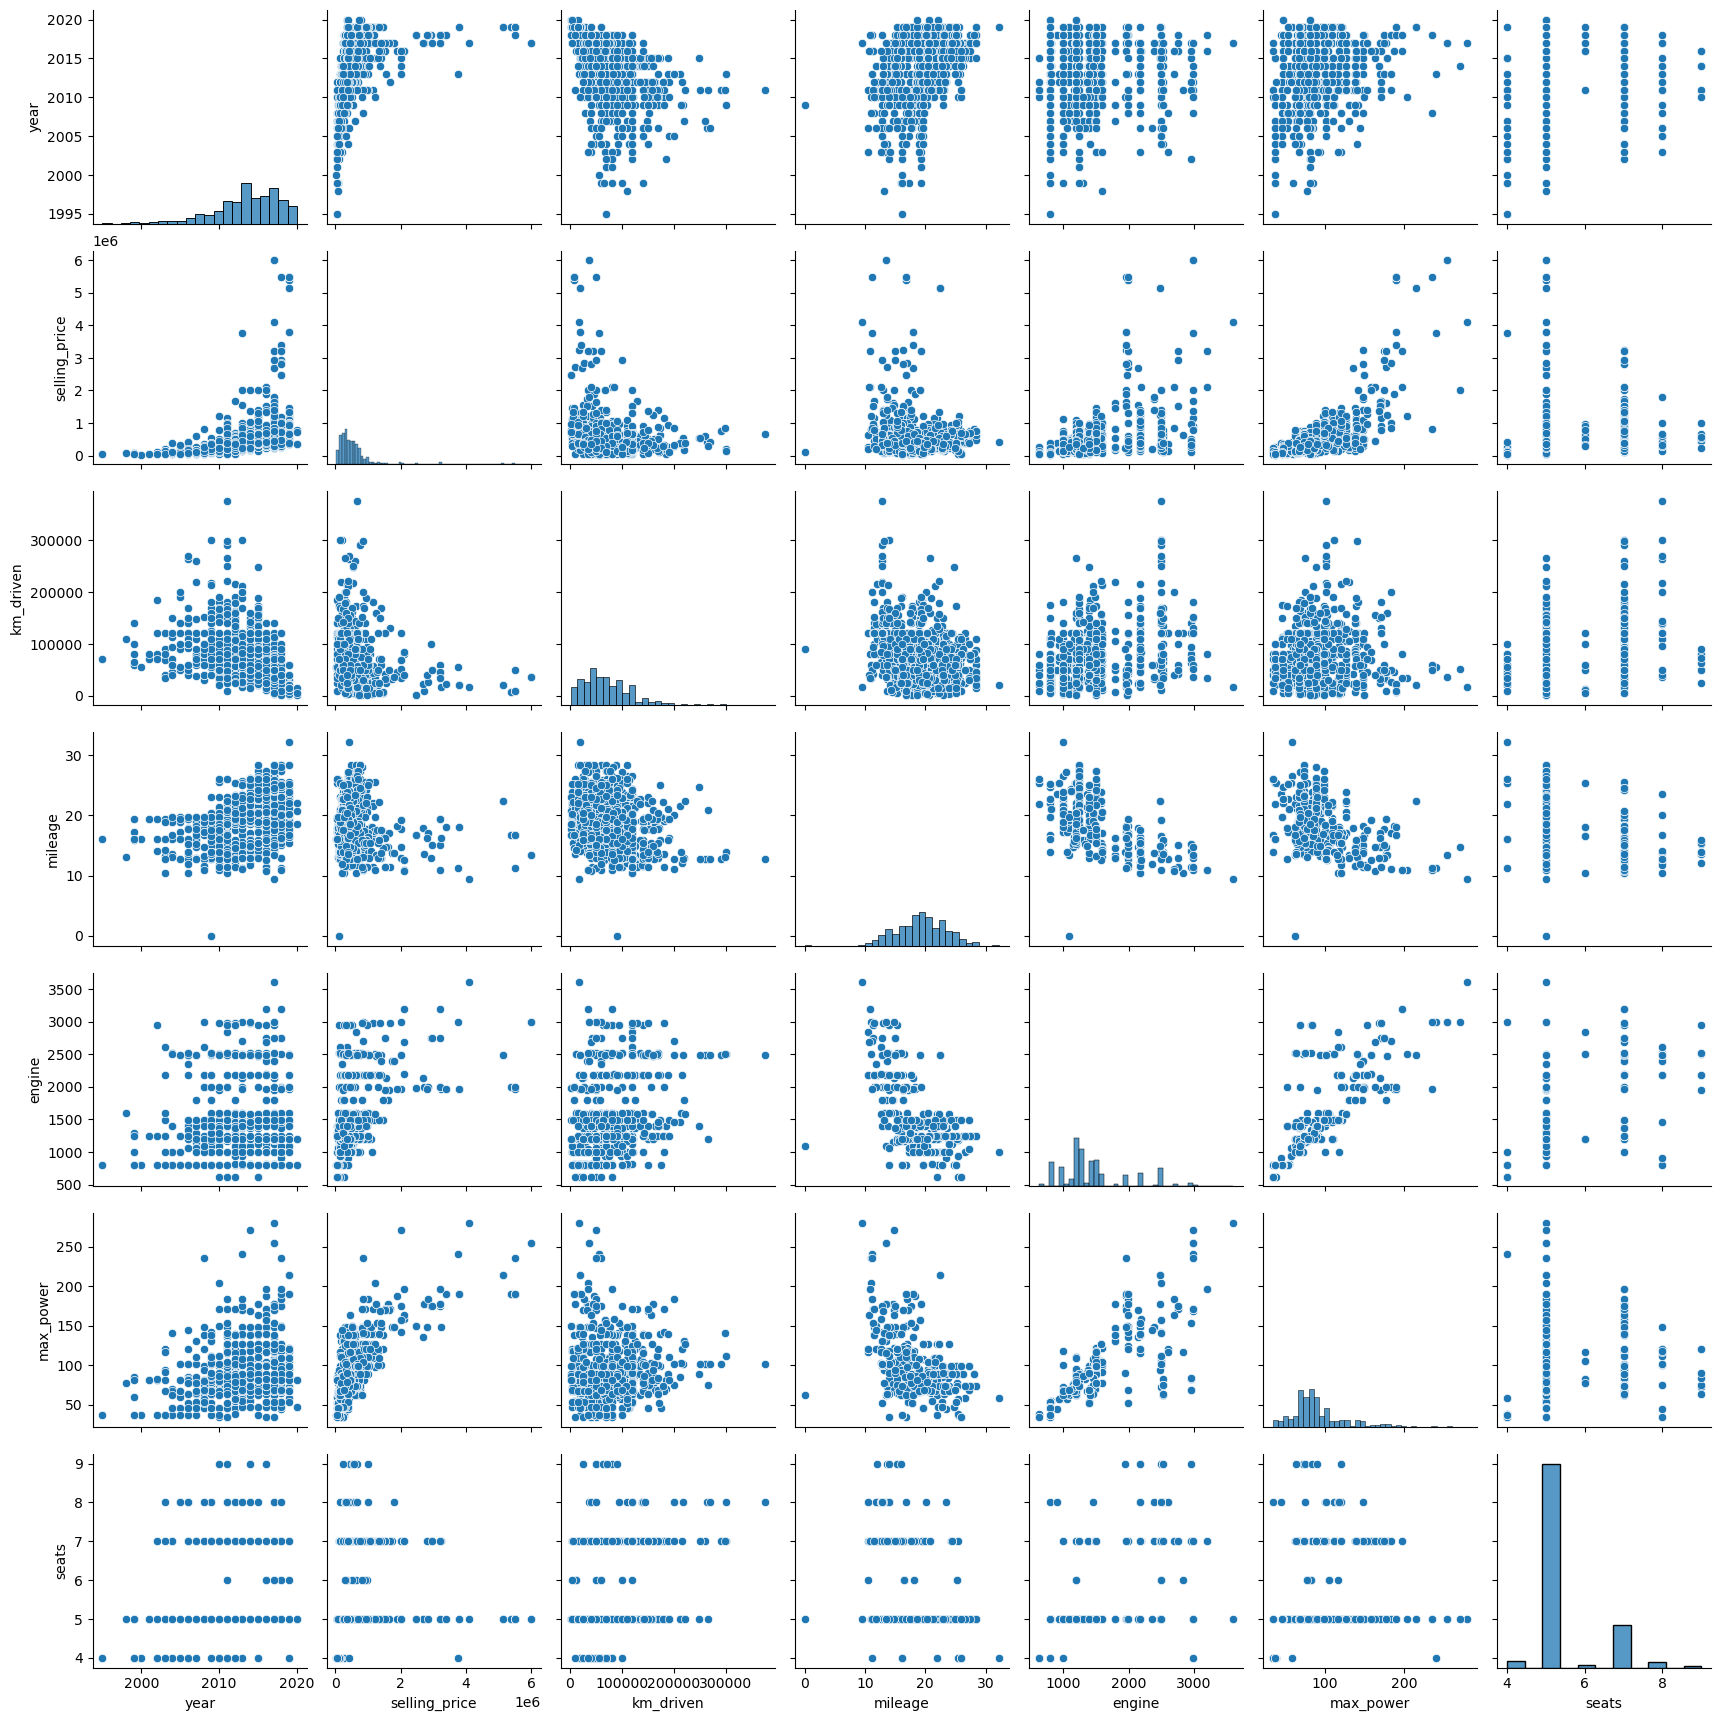

In [31]:
sns.pairplot(df_test)

In [32]:
print("Можно сказать, что данные в тесте более шумные, но в целом pairplot-ы похожи")

Можно сказать, что данные в тесте более шумные, но в целом pairplot-ы похожи


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

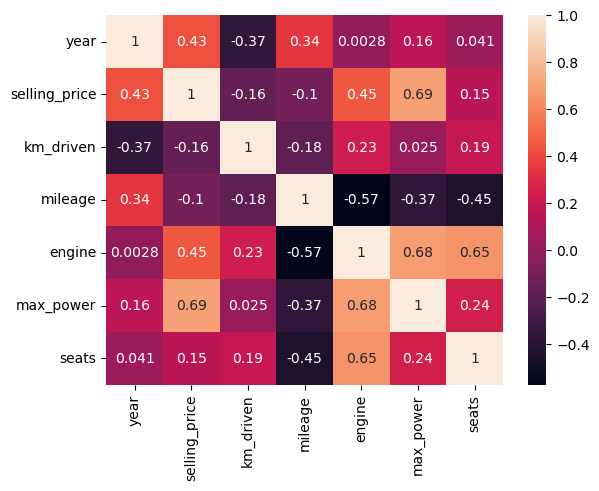

In [33]:
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [34]:
print("Year & engine")
print("Max power & engine")
print("Неуверенно, связь очень слабая")

Year & engine
Max power & engine
Неуверенно, связь очень слабая


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='engine', ylabel='max_power'>

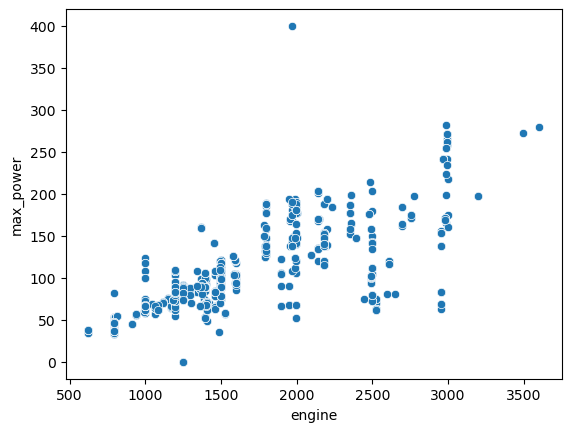

In [35]:
sns.scatterplot(df_train, x='engine', y='max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: xlabel='selling_price', ylabel='Count'>

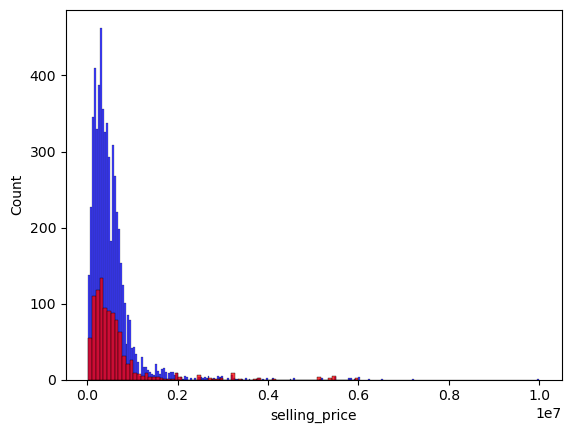

In [36]:
# Важно оценить распределение таргета
# Как видно, таргет сильно смещен
plt.figure()
sns.histplot(df_train.selling_price, color='b')
sns.histplot(df_test.selling_price, color='r')

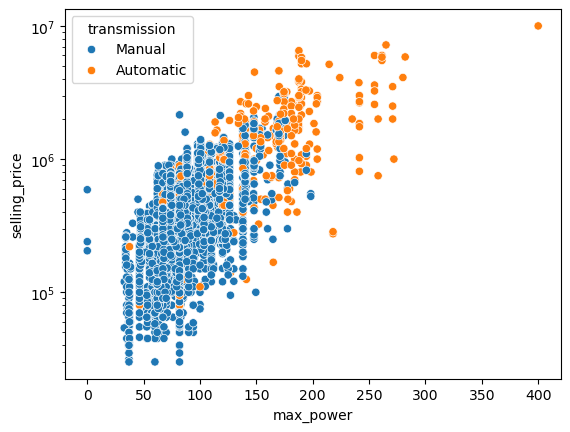

In [37]:
# Рассмотрим подробнее кросс-плот для пары selling_price & max_power
# Установим логарифмический масштаб для стоимости
sns.scatterplot(df_train, y='selling_price', x='max_power', hue='transmission')
plt.yscale('log')

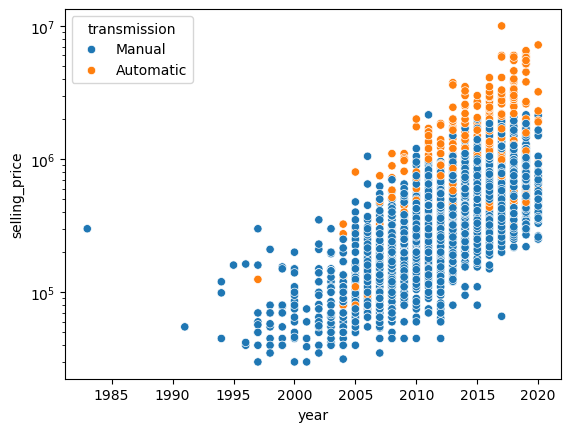

In [38]:
# Рассмотрим подробнее кросс-плот для пары selling_price & year
# Установим логарифмический масштаб для стоимости
sns.scatterplot(df_train, x='year', y='selling_price', hue='transmission')
plt.yscale('log')

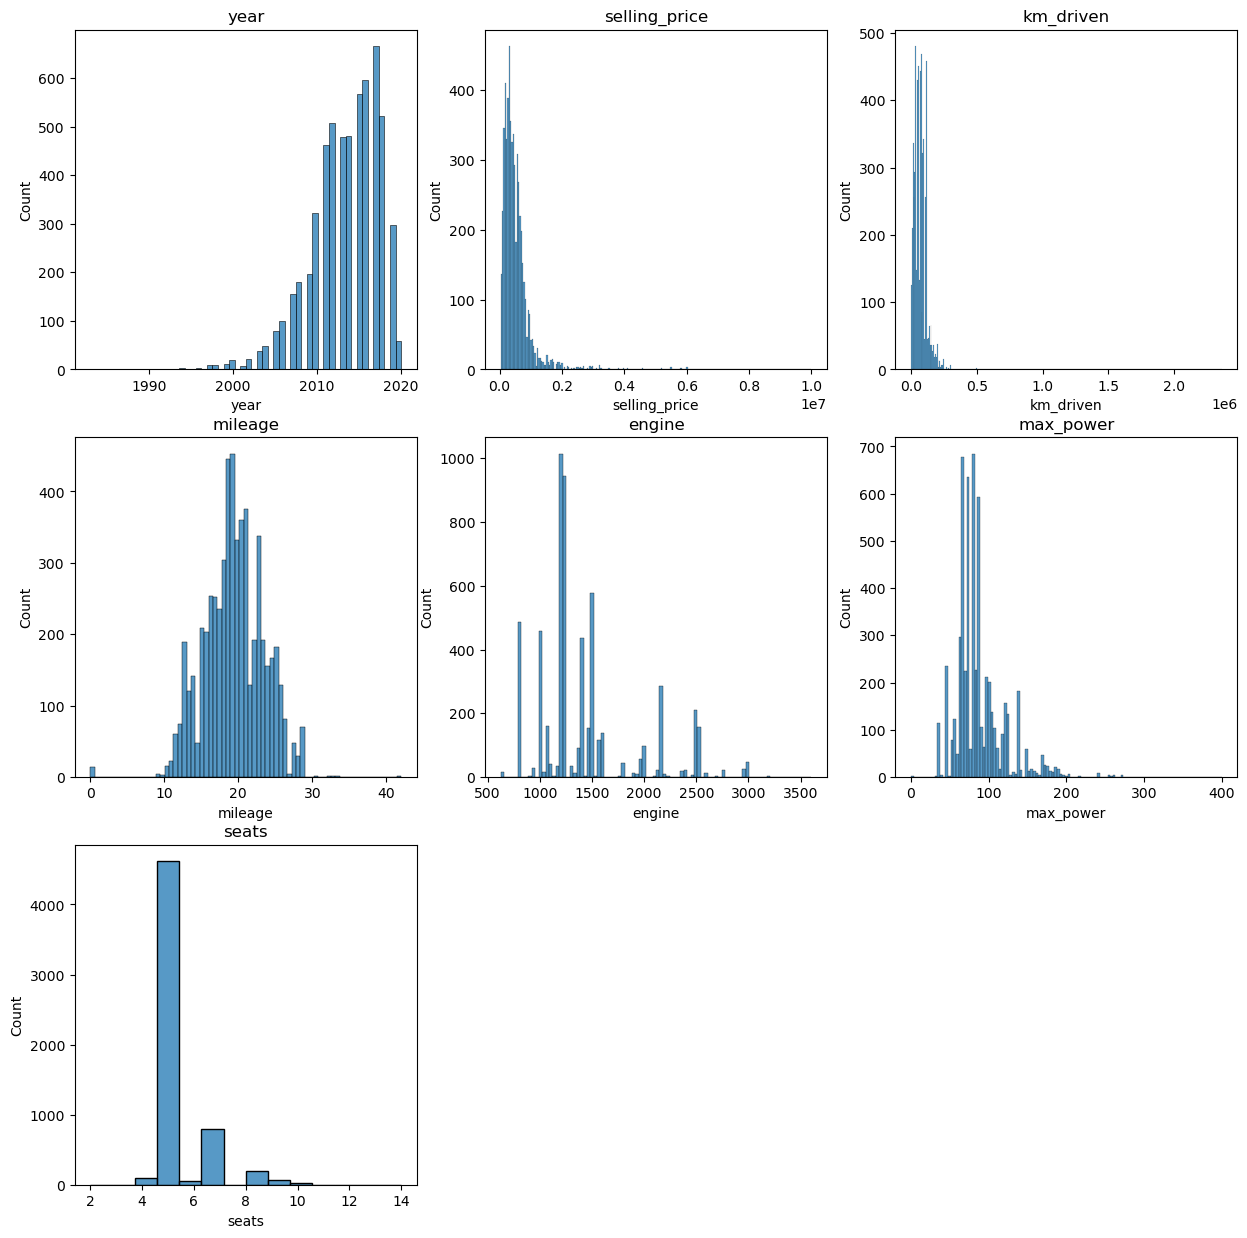

In [39]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']:
    plt.subplot(3,3,k)
    sns.histplot(df_train[i])
    plt.title(i)
    k+=1

In [40]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [41]:
print("Вероятнее всего, есть некоторая связь между логарифмом стоиомсти и годом, а также между логарифмом стоиомсти и мощностью")

Вероятнее всего, есть некоторая связь между логарифмом стоиомсти и годом, а также между логарифмом стоиомсти и мощностью


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [42]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [43]:
y_train = df_train.selling_price
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [44]:
assert X_train.shape == (5840, 6)

In [45]:
y_test = df_test.selling_price
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [46]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linear_model = LinearRegression().fit(X_train, y_train)
print('Train:')
print('MSE:', MSE(y_train, linear_model.predict(X_train)))
print('R^2:', r2_score(y_train, linear_model.predict(X_train)))
print('Test:')
print('MSE:', MSE(y_test, linear_model.predict(X_test)))
print('R^2:', r2_score(y_test, linear_model.predict(X_test)))

Train:
MSE: 116874153930.02916
R^2: 0.5922591702157295
Test:
MSE: 233298779730.45868
R^2: 0.5941419794788363


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression().fit(X_train_scaled, y_train)
print('Train:')
print('MSE:', MSE(y_train, linear_model.predict(X_train_scaled)))
print('R^2:', r2_score(y_train, linear_model.predict(X_train_scaled)))
print('Test:')
print('MSE:', MSE(y_test, linear_model.predict(X_test_scaled)))
print('R^2:', r2_score(y_test, linear_model.predict(X_test_scaled)))

Train:
MSE: 116874153930.0289
R^2: 0.5922591702157305
Test:
MSE: 233298779730.44983
R^2: 0.5941419794788516


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [49]:
linear_model.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

In [50]:
print("Наиболее информативным кажется признак:", X_train.columns[np.argmax(abs(linear_model.coef_))])

Наиболее информативным кажется признак: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [51]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Normalizer, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso().fit(X_train_scaled, y_train)
print('Train:')
print('MSE:', MSE(y_train, lasso_model.predict(X_train_scaled)))
print('R^2:', r2_score(y_train, lasso_model.predict(X_train_scaled)))
print('Test:')
print('MSE:', MSE(y_test, lasso_model.predict(X_test_scaled)))
print('R^2:', r2_score(y_test, lasso_model.predict(X_test_scaled)))

Train:
MSE: 116874153940.1429
R^2: 0.5922591701804456
Test:
MSE: 233299450599.16928
R^2: 0.5941408124026637


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [52]:
lasso_model.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

In [53]:
print("Нет, не занулила. Видимо, при значениях по умолчанию, все коэффициенты значимы, чтобы кого-то из них занулять")

Нет, не занулила. Видимо, при значениях по умолчанию, все коэффициенты значимы, чтобы кого-то из них занулять


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [54]:
from sklearn.model_selection import GridSearchCV
 
params = {'alpha': np.arange(500,2000,100),
          'fit_intercept': [True, False],
          'precompute': [True, False]}
# 60 комбинаций
lasso_model = Lasso()
grid_search = GridSearchCV(estimator=lasso_model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, cv=10)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=4,
             param_grid={'alpha': array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500,
       1600, 1700, 1800, 1900]),
                         'fit_intercept': [True, False],
                         'precompute': [True, False]},
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'alpha': 1100, 'fit_intercept': True, 'precompute': True}

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(**grid_search.best_params_).fit(X_train_scaled, y_train)
print('Train:')
print('MSE:', MSE(y_train, lasso_model.predict(X_train_scaled)))
print('R^2:', r2_score(y_train, lasso_model.predict(X_train_scaled)))
print('Test:')
print('MSE:', MSE(y_test, lasso_model.predict(X_test_scaled)))
print('R^2:', r2_score(y_test, lasso_model.predict(X_test_scaled)))

Train:
MSE: 116886082582.32042
R^2: 0.5922175545255199
Test:
MSE: 234046631743.6365
R^2: 0.5928409793704696


In [58]:
print(lasso_model.coef_, end='\n\n')
print(lasso_model.intercept_)

[152536.75396337 -42940.74014502  26825.70603715  55959.25128624
 323752.89427681 -20066.4902364 ]

522960.0910958868


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [59]:
print("60 комбинаций параметров по 10 фолдов, то есть 600 моделей")

60 комбинаций параметров по 10 фолдов, то есть 600 моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [63]:
print("Alpha: {}, при этом зануления нет".format(grid_search.best_params_['alpha']))

Alpha: 1100, при этом зануления нет


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [64]:
from sklearn.linear_model import ElasticNet

params = {'alpha': np.arange(600,1500,50),
          'l1_ratio': [.2, .4, .6, .8, 1.0],
          'fit_intercept': [True, False],
          'precompute': [True, False],
          'selection': ['cyclic','random']}

elastic_model = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, cv=10)


In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=4,
             param_grid={'alpha': array([ 600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150, 1200, 1250, 1300, 1350, 1400, 1450]),
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'precompute': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error')

In [66]:
grid_search.best_estimator_

ElasticNet(alpha=1050, l1_ratio=1.0, selection='random')

In [67]:
grid_search.best_params_

{'alpha': 1050,
 'fit_intercept': True,
 'l1_ratio': 1.0,
 'precompute': False,
 'selection': 'random'}

In [68]:
grid_search.best_score_

-121295426159.75249

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [69]:
print(grid_search.best_params_)

{'alpha': 1050, 'fit_intercept': True, 'l1_ratio': 1.0, 'precompute': False, 'selection': 'random'}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [70]:
y_train = df_train.selling_price.values
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

y_test = df_test.selling_price.values
X_test_cat = df_test.drop(columns=['selling_price', 'name'])

X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

In [71]:
assert X_train_cat.shape == (5840, 10)

In [72]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     5840        5840         5840         5840  5840
unique       4           3            2            5     9
top     Diesel  Individual       Manual  First Owner     5
freq      3177        5223         5336         3603  4618

In [73]:
X_test_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     1000        1000         1000         1000  1000
unique       4           3            2            5     6
top     Diesel  Individual       Manual  First Owner     5
freq       534         837          877          623   777

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [74]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first').set_output(transform='pandas')


In [75]:
ohetransform = ohe.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_train_cat = pd.concat([X_train_cat, ohetransform], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

ohetransform_test = ohe.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_test_cat = pd.concat([X_test_cat, ohetransform_test], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.arange(500, 1500, 10)}
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=params, scoring='r2', n_jobs=4, cv=10)

In [77]:
scaler = StandardScaler()
X_train_cat_scaled = scaler.fit_transform(X_train_cat.values)
X_test_cat_scaled = scaler.transform(X_test_cat.values)

grid_search.fit(X_train_cat_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=4,
             param_grid={'alpha': array([ 500,  510,  520,  530,  540,  550,  560,  570,  580,  590,  600,
        610,  620,  630,  640,  650,  660,  670,  680,  690,  700,  710,
        720,  730,  740,  750,  760,  770,  780,  790,  800,  810,  820,
        830,  840,  850,  860,  870,  880,  890,  900,  910,  920,  930,
        940,  950,  960,  970,  980,  990, 1000, 1010, 1020, 1030, 1040,
       1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150,
       1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260,
       1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370,
       1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480,
       1490])},
             scoring='r2')

In [78]:
grid_search.best_estimator_

Ridge(alpha=630)

In [79]:
grid_search.best_score_

0.6218020061826282

In [80]:
ridge_model = Ridge(alpha=630)
scaler = StandardScaler()
X_train_cat_scaled = scaler.fit_transform(X_train_cat.values)
X_test_cat_scaled = scaler.transform(X_test_cat.values)

ridge_model.fit(X_train_cat_scaled, y_train)
print('Train:')
print('MSE:', MSE(y_train, ridge_model.predict(X_train_cat_scaled)))
print('R^2:', r2_score(y_train, ridge_model.predict(X_train_cat_scaled)))
print('Test:')
print('MSE:', MSE(y_test, ridge_model.predict(X_test_cat_scaled)))
print('R^2:', r2_score(y_test, ridge_model.predict(X_test_cat_scaled)))

Train:
MSE: 96662844634.38043
R^2: 0.6627707054536068
Test:
MSE: 223242092198.4637
R^2: 0.6116370872520145


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [138]:
# Загружаю заново данные

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
import re

In [5]:
# Удаляем дубликаты, восстанавливаем индексы
df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns.values, keep='first', inplace=True)
df_train.reset_index(drop=True, inplace=True)
# Приводим в порядок формат некоторых признаков
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: re.sub(' bhp', '', x) if type(x) is str else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x) if (type(x) is str and len(x)>0) else np.nan if (type(x) is str and len(x)==0) else x)

df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.split()[0]) if type(x) is str else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: re.sub(' bhp', '', x) if type(x) is str else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x) if (type(x) is str and len(x)>0) else np.nan if (type(x) is str and len(x)==0) else x)
# Убиваем колонку torque
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

In [6]:
# Смотрим, сколько процентов данных является пропуском
(df_train.isna().sum().max() / df_train.shape[0]) * 100

3.184931506849315

In [7]:
# Так как пропущенных значений лишь 3 процента, то вместе заполнения данных решено удалить все записи с пустыми значениями
df_train.dropna(inplace=True)

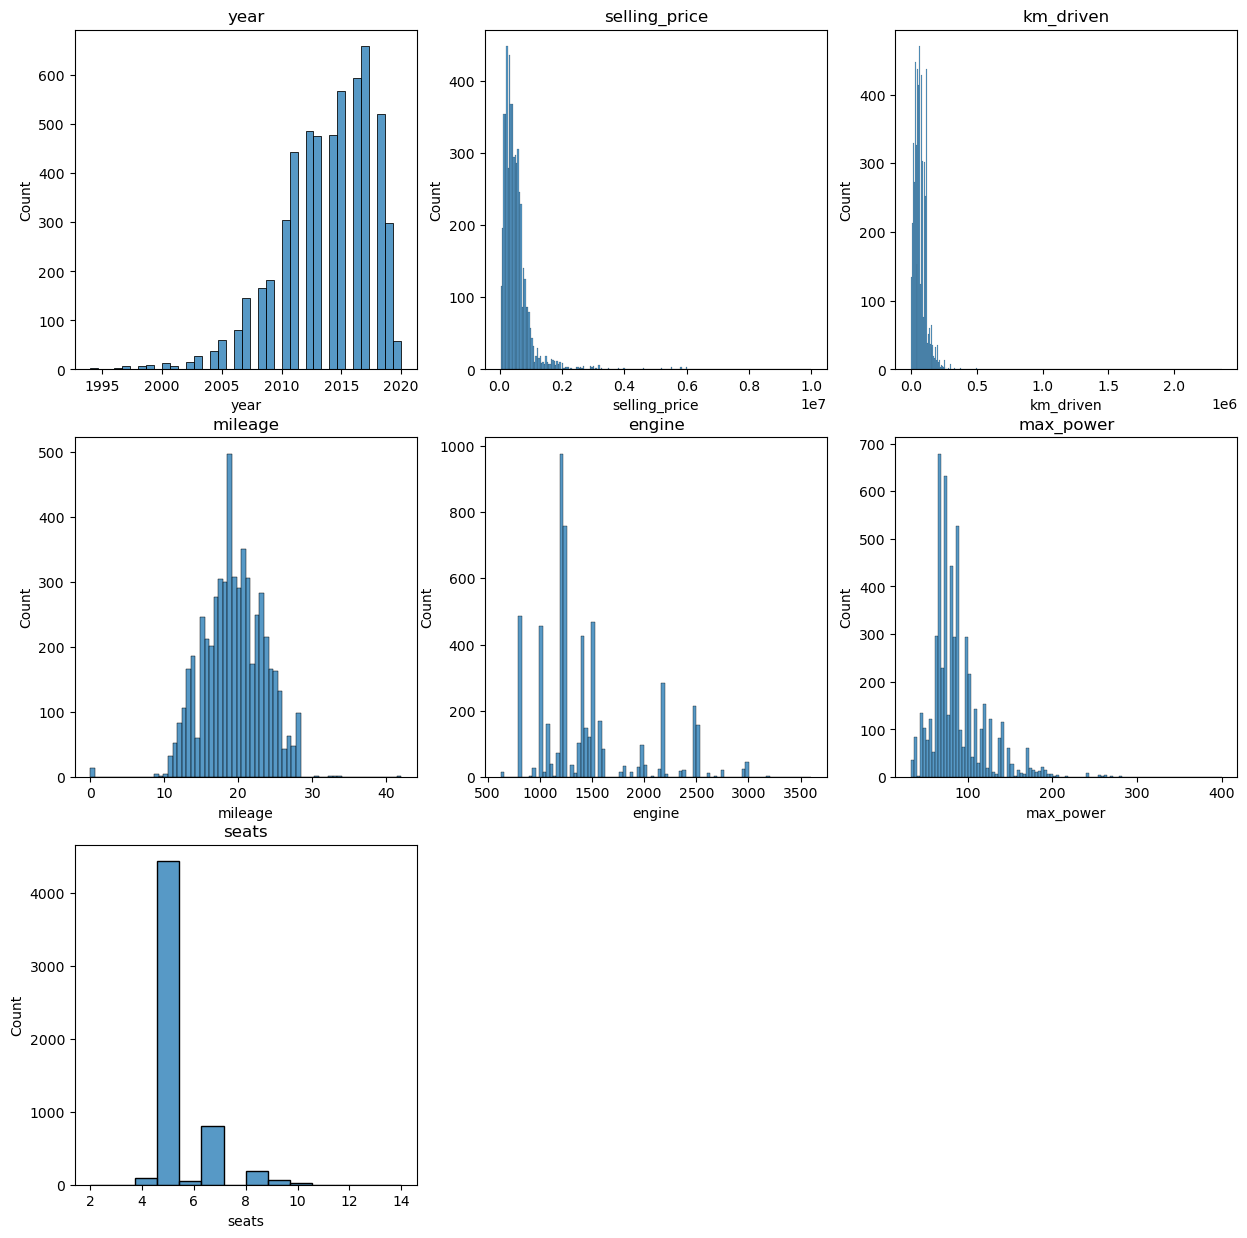

In [8]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']:
    plt.subplot(3,3,k)
    sns.histplot(df_train[i])
    plt.title(i)
    k+=1

In [9]:
# обработка выбросов с помощью перцентилей
df_train = df_train[df_train.selling_price < np.percentile(df_train.selling_price, 99.5)]
df_train = df_train[df_train.km_driven < np.percentile(df_train.km_driven, 99.5)]
df_train = df_train[df_train.max_power < np.percentile(df_train.max_power, 99.5)]

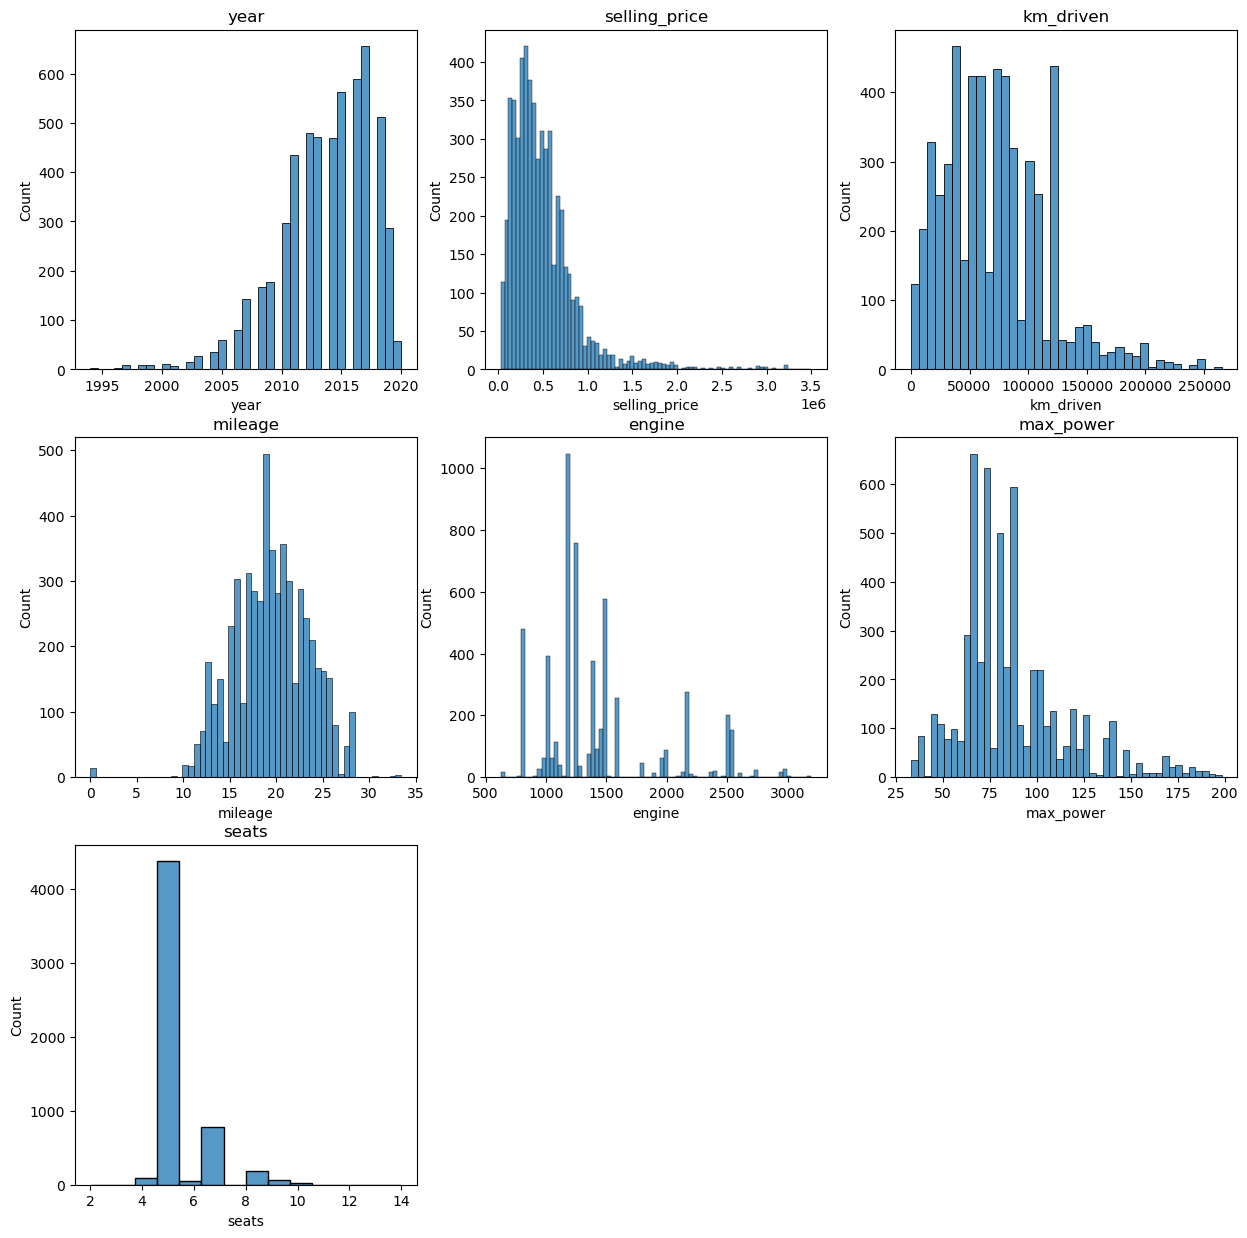

In [10]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']:
    plt.subplot(3,3,k)
    sns.histplot(df_train[i])
    plt.title(i)
    k+=1

In [11]:
# логарифмирование таргета
df_train['selling_price'] = np.log10(df_train['selling_price'])

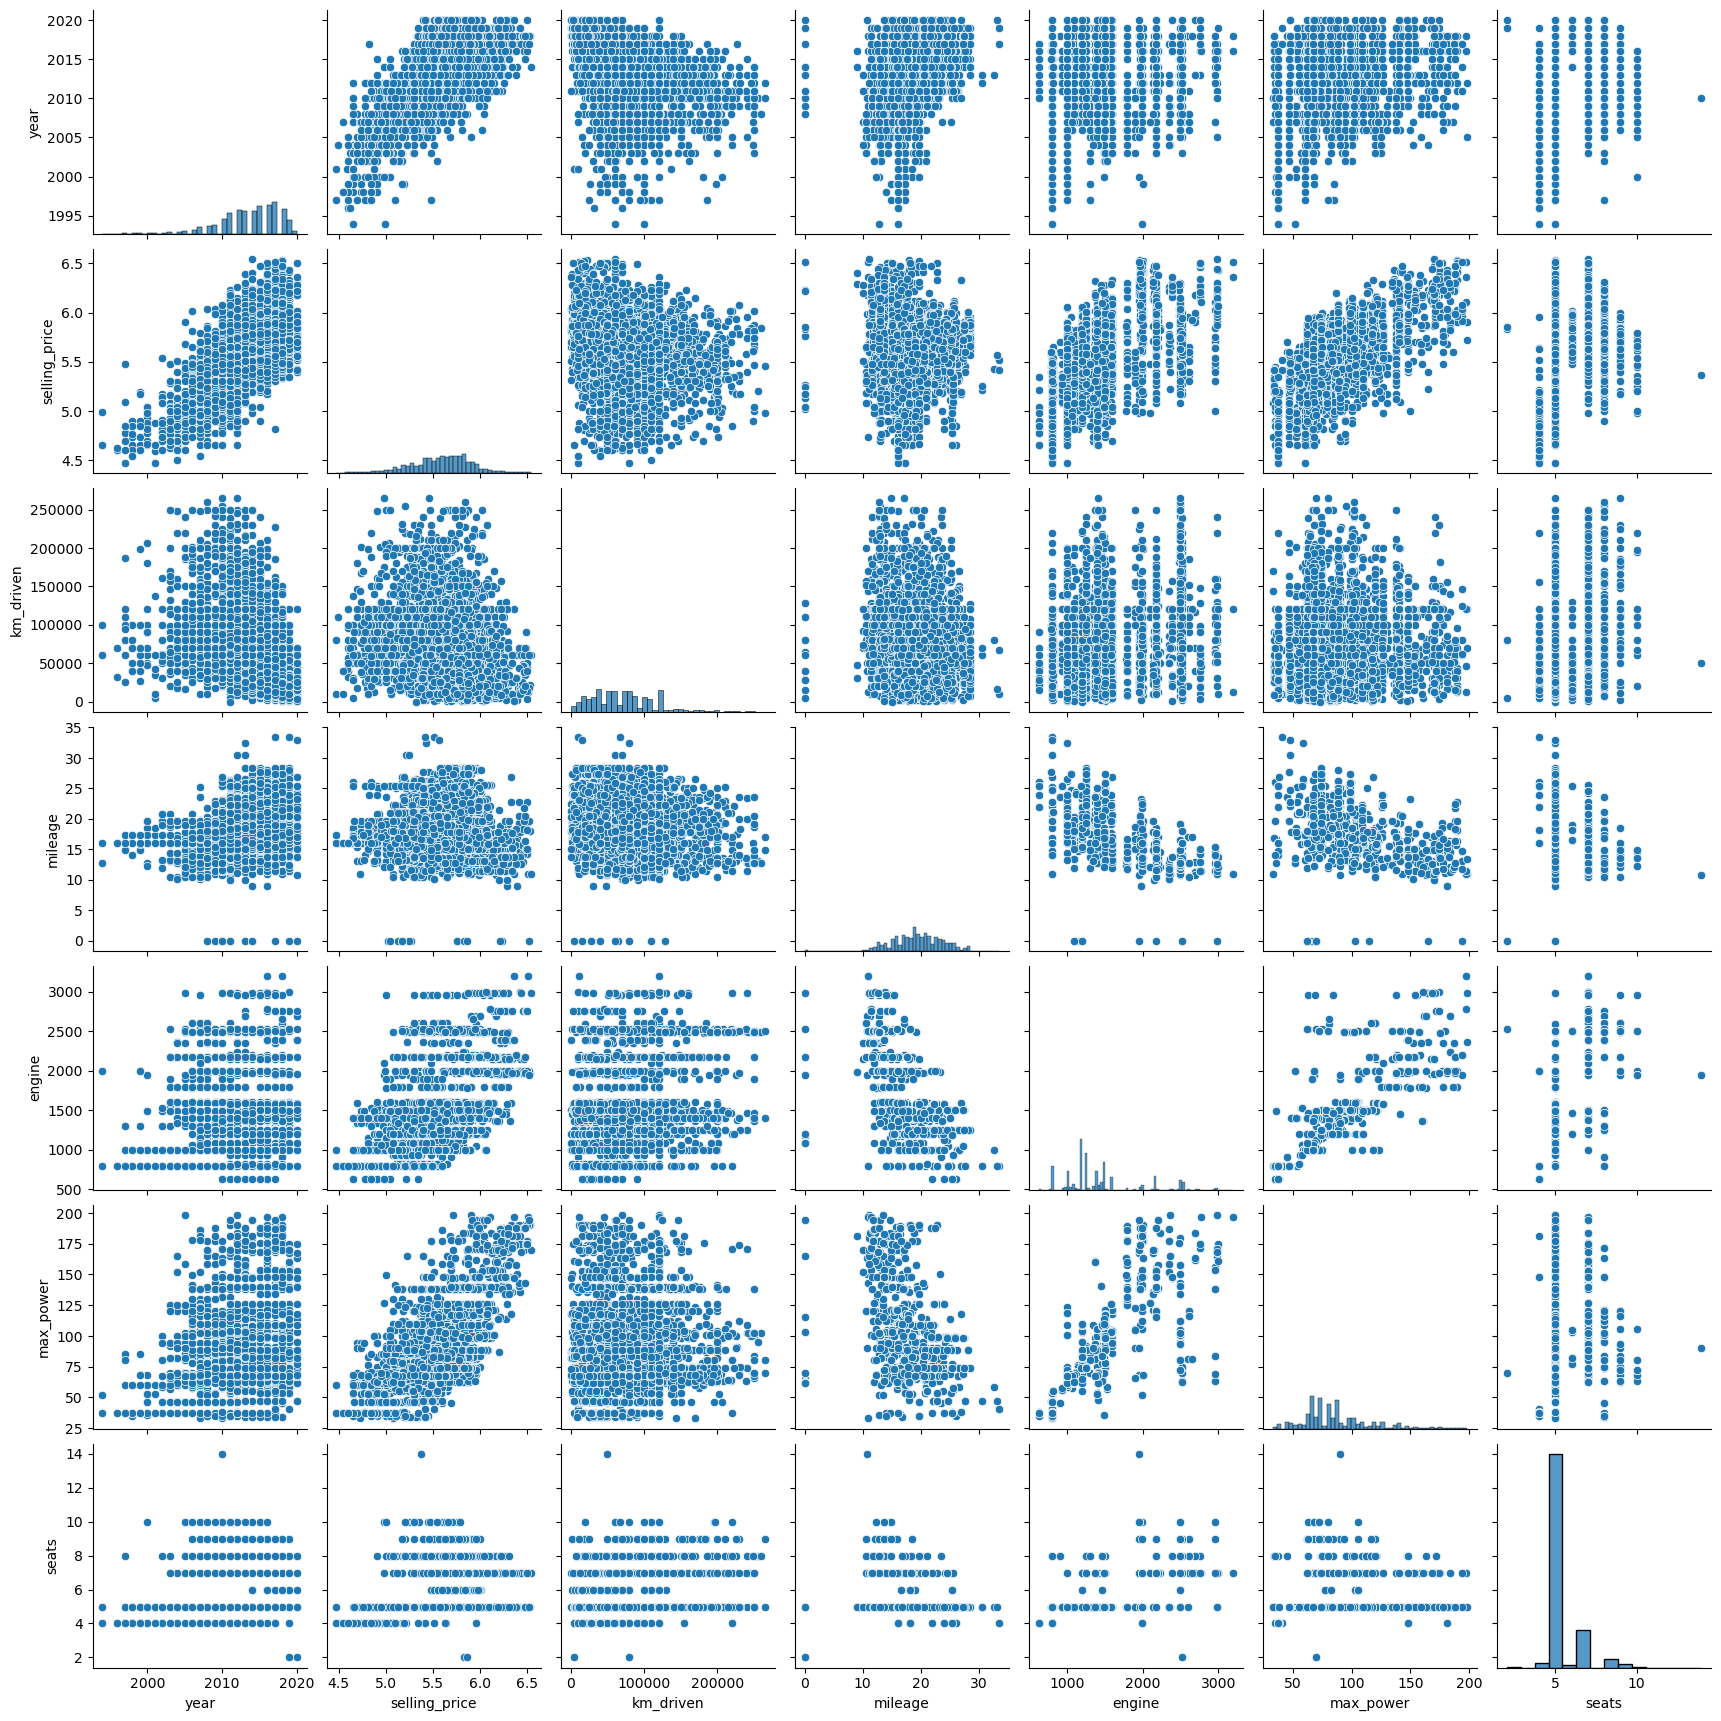

In [12]:
sns.pairplot(df_train)

In [13]:
# генерация новых признаков
df_train['age'] = 2023 - df_train.year
df_test['age'] = 2023 - df_test.year

df_train['power_per_liter'] = df_train.max_power/df_train.engine
df_test['power_per_liter'] = df_test.max_power/df_test.engine

df_train['year_pow2'] = df_train.year**2
df_test['year_pow2'] = df_test.year**2

df_train['sqrt_max_power'] = np.sqrt(df_train.max_power)
df_test['sqrt_max_power'] = np.sqrt(df_test.max_power)

df_train['sqrt_engine'] = np.sqrt(df_train.engine)
df_test['sqrt_engine'] = np.sqrt(df_test.engine)


In [14]:
# логарифмирование некоторых признаков
df_train['max_power'] = np.log10(df_train['max_power'])
df_test['max_power'] = np.log10(df_test['max_power'])

In [15]:
# Выкинем названия
df_train = df_train.drop(columns=['name'])
df_test = df_test.drop(columns=['name'])

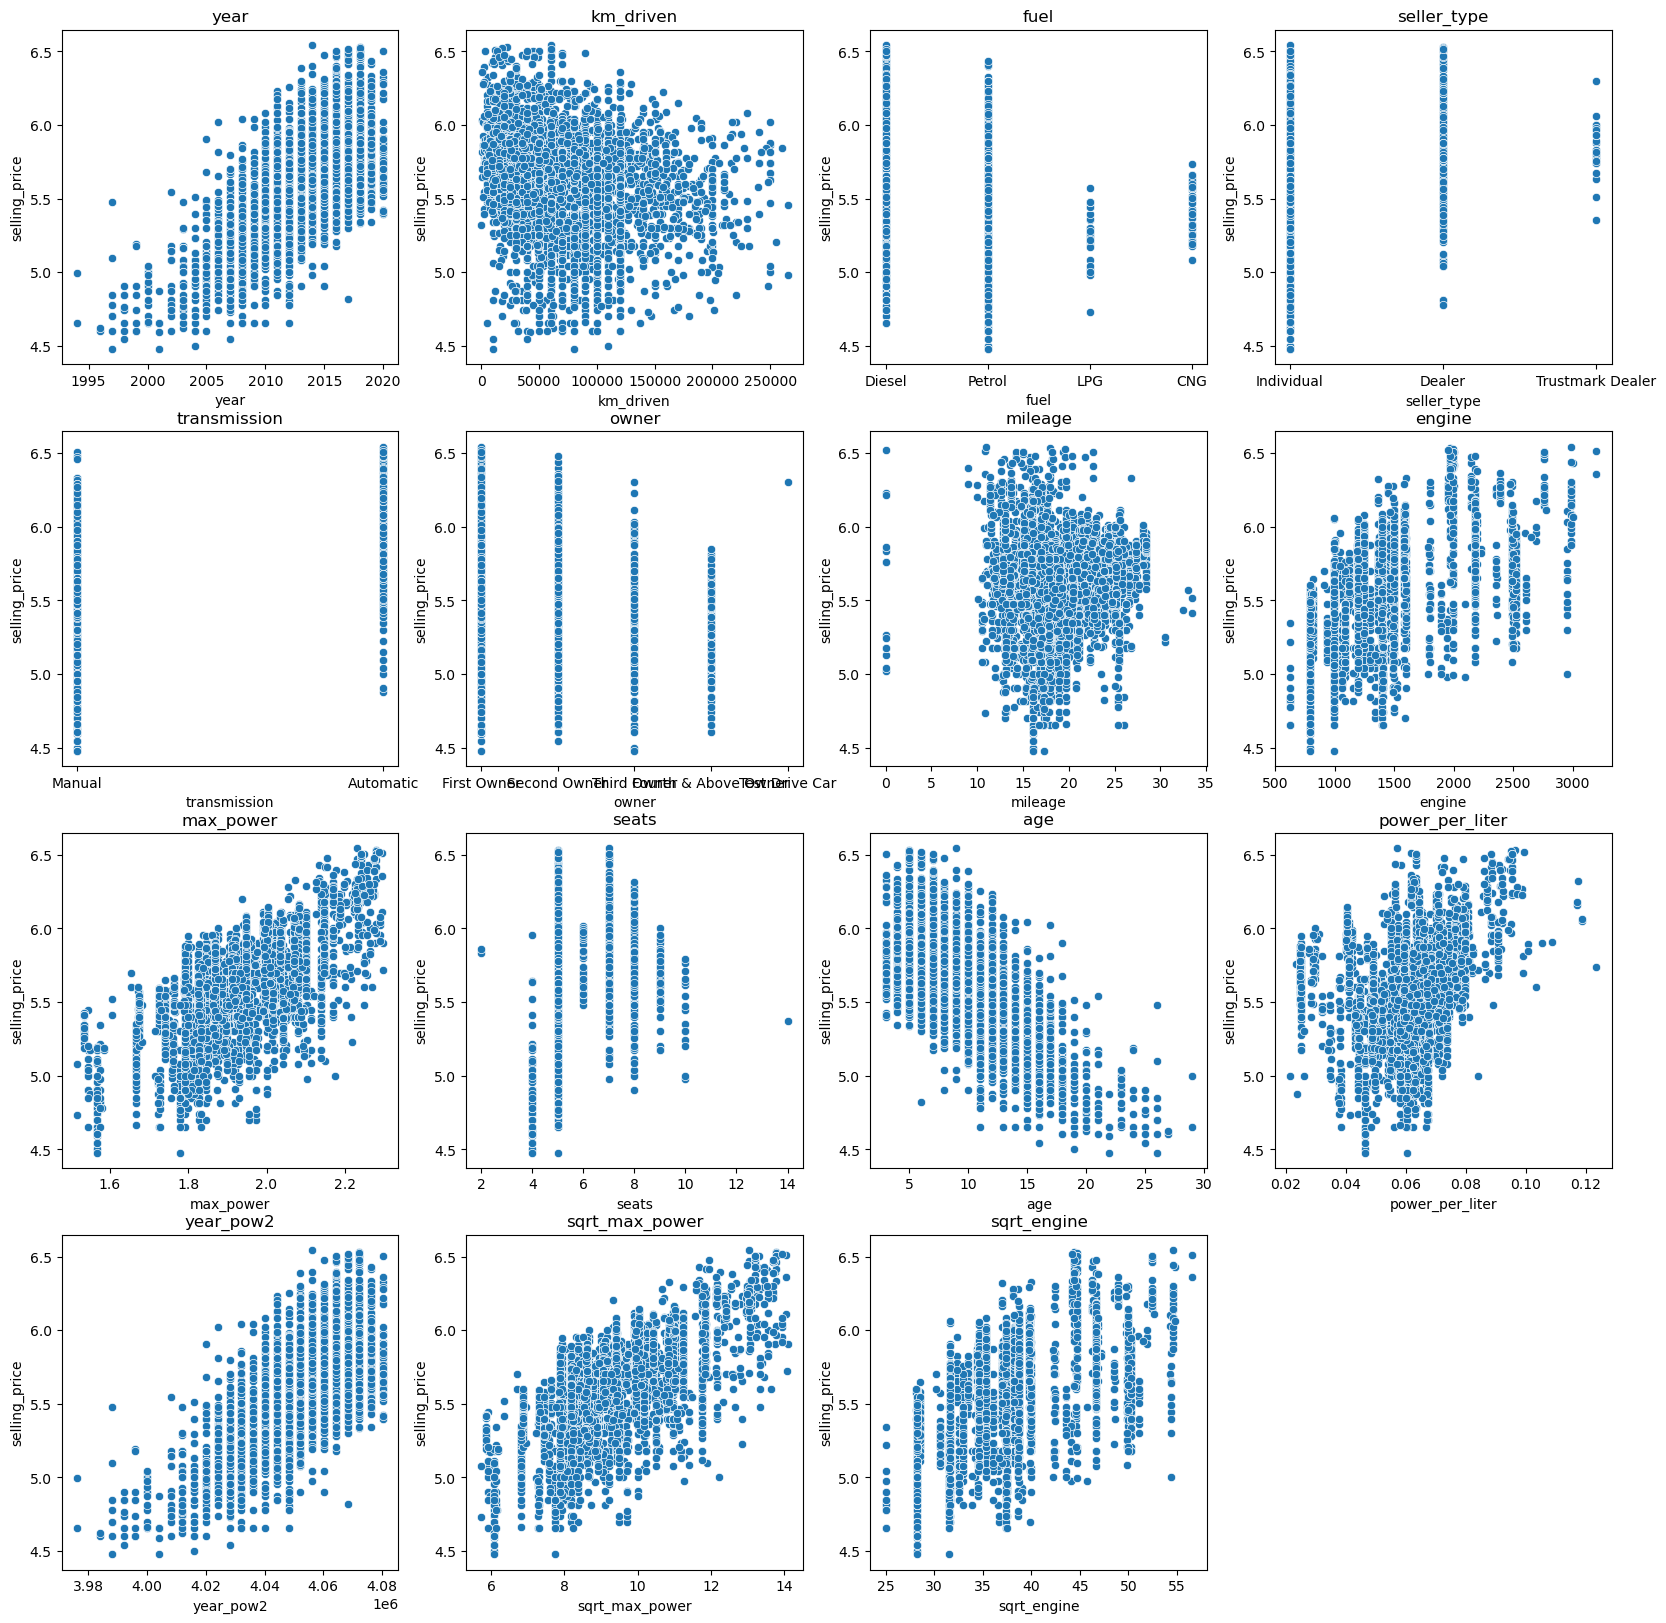

In [16]:
# посмотрим связи признаков с таргетом
fig = plt.figure(figsize=(20,20))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in ['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'age', 'power_per_liter', 'year_pow2', 'sqrt_max_power',
       'sqrt_engine']:
    plt.subplot(4,4,k)
    sns.scatterplot(df_train, x=i, y='selling_price')
    plt.title(i)
    k+=1

In [17]:
# избавимся от некоторых признаков 
df_train.drop(columns=['year', 'mileage', 'seats', 'engine'], inplace=True)
df_test.drop(columns=['year', 'mileage', 'seats', 'engine'], inplace=True)

In [18]:
y_train = df_train[['selling_price']]
X_train_cat = df_train.drop(columns=['selling_price'])

y_test = df_test[['selling_price']]
X_test_cat = df_test.drop(columns=['selling_price'])

In [19]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first').set_output(transform='pandas')

ohetransform = ohe.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner']])
X_train_cat = pd.concat([X_train_cat, ohetransform], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner'])

ohetransform_test = ohe.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner']])
X_test_cat = pd.concat([X_test_cat, ohetransform_test], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [20]:
X_test_cat.isna().sum()

km_driven                        0
max_power                       19
age                              0
power_per_liter                 19
year_pow2                        0
sqrt_max_power                  19
sqrt_engine                     19
fuel_Diesel                      0
fuel_LPG                         0
fuel_Petrol                      0
seller_type_Individual           0
seller_type_Trustmark Dealer     0
transmission_Manual              0
owner_Fourth & Above Owner       0
owner_Second Owner               0
owner_Test Drive Car             0
owner_Third Owner                0
dtype: int64

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train_cat)

KNNImputer()

In [22]:
X_train_cat = X_train_cat.values
X_test_cat = imputer.transform(X_test_cat)

In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.linear_model import Ridge

params = {'alpha': np.arange(0.0000001,0.1,0.00005)}
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, cv=10)


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=4,
             param_grid={'alpha': array([1.00000e-07, 5.01000e-05, 1.00100e-04, ..., 9.98501e-02,
       9.99001e-02, 9.99501e-02])},
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_score_

-0.015978753834081816

In [60]:
grid_search.best_params_

{'alpha': 1e-07}

In [62]:
ridge_model = Ridge(**grid_search.best_params_)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1e-07)

In [63]:
import pickle

In [64]:
model_filename = "my_ridge_model.pickle"
scaler_filename = "my_scaler.pickle"
pickle.dump(ridge_model, open(model_filename, "wb"))
pickle.dump(scaler, open(scaler_filename, "wb"))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [65]:
prediction = ridge_model.predict(X_test_scaled)

In [66]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(abs(y_pred/y_true-1)<=0.1)

In [67]:
business_metrics(y_test, 10**prediction)

0.292

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link